# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [23]:
from bs4 import BeautifulSoup
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from splinter import Browser

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

In [3]:
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [4]:
html = browser.html

### Step 2: Scrape the Table

In [5]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')

In [7]:
# Create an empty list
rows_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    data = row.find_all('td')
    Id = data[0].text
    terrestrial_date = data[1].text
    sol = data[2].text
    ls = data[3].text
    month = data[4].text
    min_temp = data[5].text
    pressure = data[6].text
    row_dict ={
        'id' : Id,
        'terrestrial_date' : terrestrial_date,
        'sol' : sol,
        'ls' : ls,
        'month' : month,
        'min_temp' : min_temp,
        'pressure' : pressure,
    }
    rows_list.append(row_dict)


In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows_list, columns= ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [9]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
df = df.astype({'id': 'int32',
           'sol': 'int32',
           'ls': 'int32',
           'month': 'int32',
           'min_temp': 'float',
           'pressure': 'float'})

In [12]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [13]:
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
df.groupby(by='month')['month'].count()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [15]:
# 2. How many Martian days' worth of data are there?
df['sol'].unique().size

1867

In [16]:
# 3. What is the average low temperature by month?
df.groupby('month')['min_temp'].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [24]:
color = cm.inferno_r(np.linspace(.4, .8, 30))

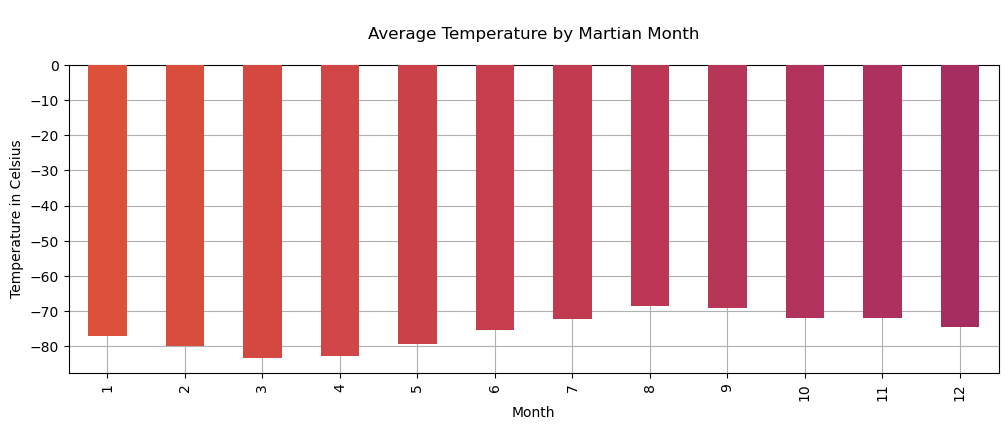

In [43]:
# Plot the average temperature by month
average_temperature_by_month = df.groupby('month')['min_temp'].mean()
average_temperature_by_month.plot.bar(xlabel='Month\n', ylabel='Temperature in Celsius', title= '\nAverage Temperature by Martian Month\n', figsize=(12, 4), color = color, grid=True, zorder=3 )
plt.savefig("bar-plot1.png", bbox_inches = 'tight')

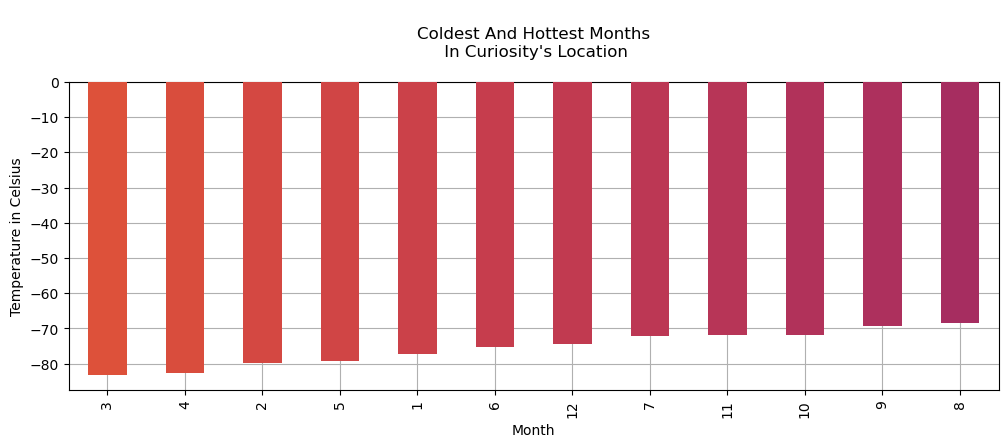

In [44]:
# Identify the coldest and hottest months in Curiosity's location
coldest_and_hottest_months = df.groupby(by='month')['min_temp'].mean().sort_values(ascending=True)
coldest_and_hottest_months.plot.bar(xlabel='Month', ylabel='Temperature in Celsius', title= "\nColdest And Hottest Months\n In Curiosity's Location\n", figsize=(12, 4), color = color, grid=True, zorder=3)
plt.savefig("bar-plot2.png", bbox_inches = 'tight')

In [17]:
# 4. Average pressure by Martian month
df.groupby('month')['pressure'].mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


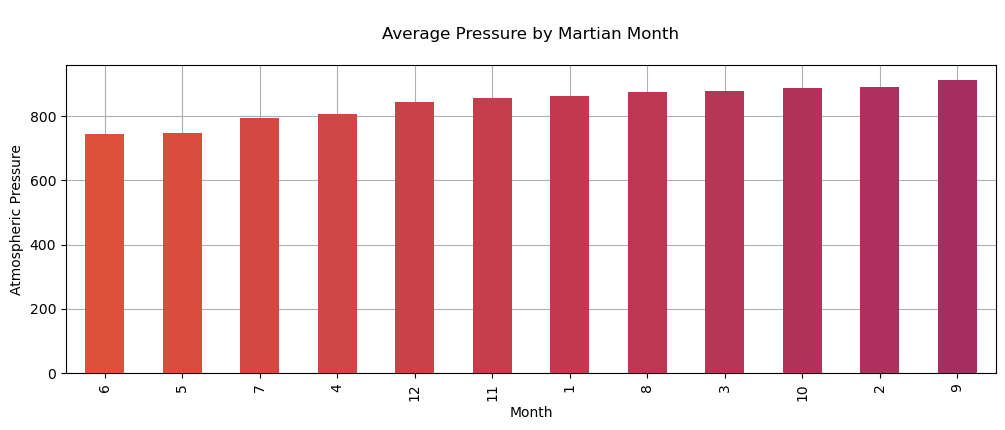

In [45]:
# Plot the average pressure by month
average_pressure_by_month = df.groupby('month')['pressure'].mean().sort_values(ascending=True)
average_pressure_by_month.plot.bar(xlabel='Month', ylabel='Atmospheric Pressure', title= '\nAverage Pressure by Martian Month\n', figsize=(12, 4), color = color, grid=True, zorder=3)
plt.savefig("bar-plot3.png", bbox_inches = 'tight')

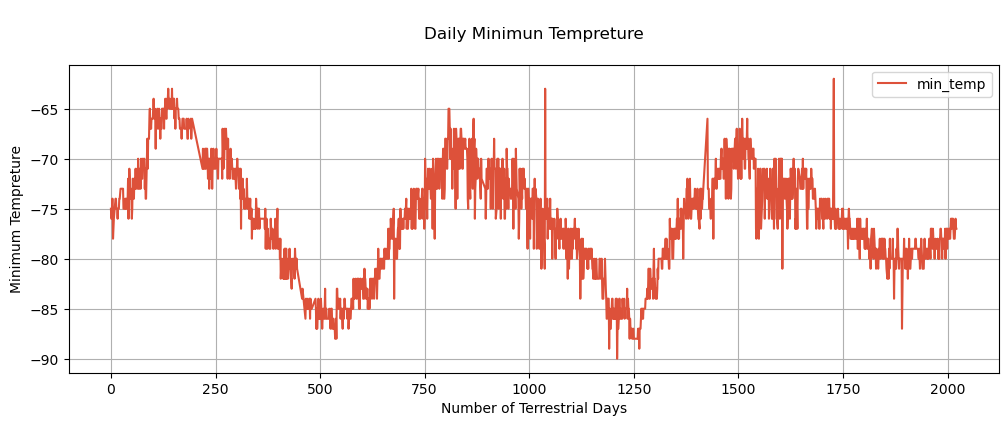

In [47]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Convert the terrestrial date to terrestial days
min_date = df['terrestrial_date'].min()
df_copy = df
df_copy['days'] = (df_copy['terrestrial_date'] - min_date).dt.days
# Plot the daily tempreture change to find the Martian year between two peaks
df_copy.plot(x='days', y = 'min_temp', xlabel='Number of Terrestrial Days', ylabel='Minimum Tempreture', title= '\nDaily Minimun Tempreture\n', figsize=(12, 4), color = color, grid=True, zorder=3)
plt.savefig("line-plot.png", bbox_inches = 'tight')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [97]:
# Write the data to a CSV
df_copy.to_csv('data.csv')

In [98]:
browser.quit()